In [4]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='MYSQL',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/Tarushika Sharma/OneDrive/Desktop/Ecommerce_Data'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db= mysql.connector.connect(host = 'localhost',username = 'root',password='MYSQL',database = 'ecommerce')

cur=db.cursor()

 # List all unique cities where customers are located.    

In [5]:
que = """select distinct (customer_city)from customers """
cur.execute(que)
data=cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [9]:
que= """ select count(order_purchase_timestamp) from orders where order_purchase_timestamp = 2017"""
cur.execute(que)
data = cur.fetchall()
"Total Orders Places are : ",data[0][0]

('Total Orders Places are : ', 45101)

# Find the total sales per category.

In [10]:
query = """ select upper(products.product_category) category,
round(sum(payments.payment_value),2)sales 
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id=order_items.order_id
group by category
"""
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data,columns =["Category","Sales"])
df

,Category,Sales
0,PERFUMERY,4053909.28
1,FURNITURE DECORATION,11441411.13
2,TELEPHONY,3895056.41
3,BED TABLE BATH,13700429.37
4,AUTOMOTIVE,6818354.65
...,...,...
69,CDS MUSIC DVDS,9595.44
70,LA CUISINE,23308.24
71,FASHION CHILDREN'S CLOTHING,6285.36
72,PC GAMER,17395.44


 # Count the number of customers from each state. 

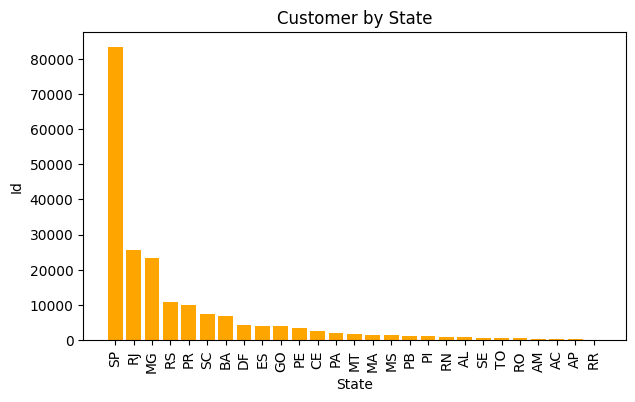

In [62]:
que = """select customer_state, count(customer_id) total_state from customers group by customer_state """
cur.execute(que)
data=cur.fetchall()
data
df = pd.DataFrame(data,columns = ["State","Id"])
df=df.sort_values(by = "Id", ascending = False)

plt.figure(figsize=(7,4))
plt.bar(df["State"],df["Id"], color= "orange")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Id")
plt.title("Customer by State")
plt.show()

# Calculate the number of orders per month in 2018.

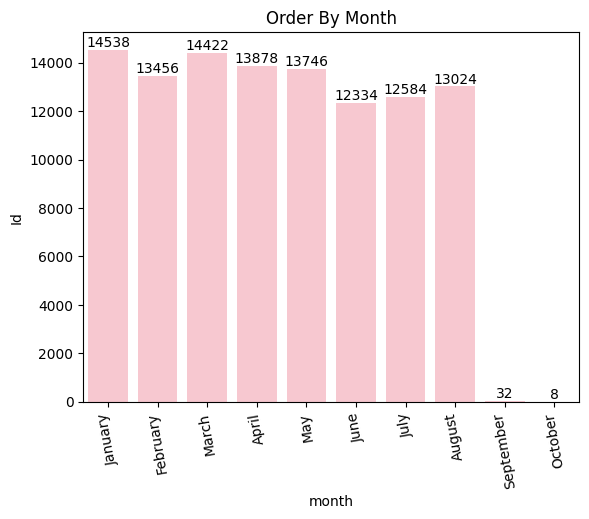

In [65]:
que = """ select monthname(order_purchase_timestamp) month, count(order_id) Id
from orders where year(order_purchase_timestamp) = 2018
group by month
"""
cur.execute(que)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["month","Id"])

o = ["January","February","March","April","May","June","July","August","September","October"]   
ax = sns.barplot(x = df["month"],y = df["Id"], data = df, order = o, color = 'pink')          #seaborn(automatically change the title of perticular name)
plt.xticks (rotation = 100)
ax.bar_label(ax.containers[0])    #data Label
plt.title("Order By Month")
plt.show()



# Find the average number of products per order, grouped by customer city.

In [14]:
que= """ with count_per_order as
(select orders.order_id, orders.customer_id, count(order_items.order_id) as od
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city,round(avg(count_per_order.od),2) as avg_order
from customers join count_per_order 
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by avg_order desc;

"""
cur.execute(que)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Customer_city","Average_product/Order"])
df.head(10)

,Customer_city,Average_product/Order
0,padre carvalho,28.00
1,celso ramos,26.00
2,datas,24.00
3,candido godoi,24.00
4,matias olimpio,20.00
5,cidelandia,16.00
6,picarra,16.00
7,morro de sao paulo,16.00
8,teixeira soares,16.00
9,curralinho,16.00


# Calculate the percentage of total revenue contributed by each product category.

In [8]:
query = """select upper(products.product_category) category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales 
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id=order_items.order_id
group by category order by sales desc"""

cur.execute(query) 
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category","Distribution"])
df.head()

,Category,Distribution
0,BED TABLE BATH,42.79
1,HEALTH BEAUTY,41.41
2,COMPUTER ACCESSORIES,39.61
3,FURNITURE DECORATION,35.73
4,WATCHES PRESENT,35.71


# Calculate the moving average of order values for each customer over their order history. 

In [14]:
query = """select customer_id, order_purchase_timestamp,payment,
avg(payment)over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as moving_avg
from 
(select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as t"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
...,...,...,...,...
415539,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
415540,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
415541,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
415542,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


# Calculate the cumulative sales per month for each year.

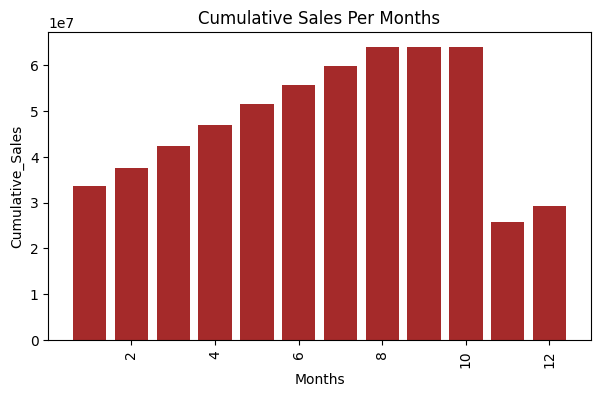

In [33]:
query = """ select years,months,payment,sum(payment)
over(order by years,months) as cumulative_sales
from
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders
join payments on orders.order_id = payments.order_id
group by years , months order by years,months) as t;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Years","Months","Payments","Cumulative_Sales"])

plt.figure(figsize=(7,4))
plt.bar(df["Months"],df["Cumulative_Sales"], color= "brown")

plt.xticks(rotation=90)
plt.xlabel("Months")
plt.ylabel("Cumulative_Sales")
plt.title("Cumulative Sales Per Months")
plt.show()

# Calculate the year-over-year growth rate of total sales.

In [41]:
query = """with t as
(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders
join payments on orders.order_id = payments.order_id
group by years order by years)

select Years,((Payment - lag(Payment,1) over(order by Years)) /
lag(Payment,1) over(order by Years))*100
from t

"""

#year over year formula(current_Sales-Previous_Year_Sales/Previous_Year_Sales)
#current Value is:- Payment
# Previous Year value is:- lag(Payment,1) over(order by Years)

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Years","YOY_%_Growth"])
df

,Years,YOY_%_Growth
0,2016,NaN
1,2017,12112.703757
2,2018,20.000924
